 # ANALYSIS OF ENGLISH PREMIER LEAGUE STATS 2022/23

## “ It’s difficult to make predictions in the Premier League, as unpredictable things can happen, and I know that well: I won the title in a crazy way and lost one unexpectedly ”
## — Joe Hart



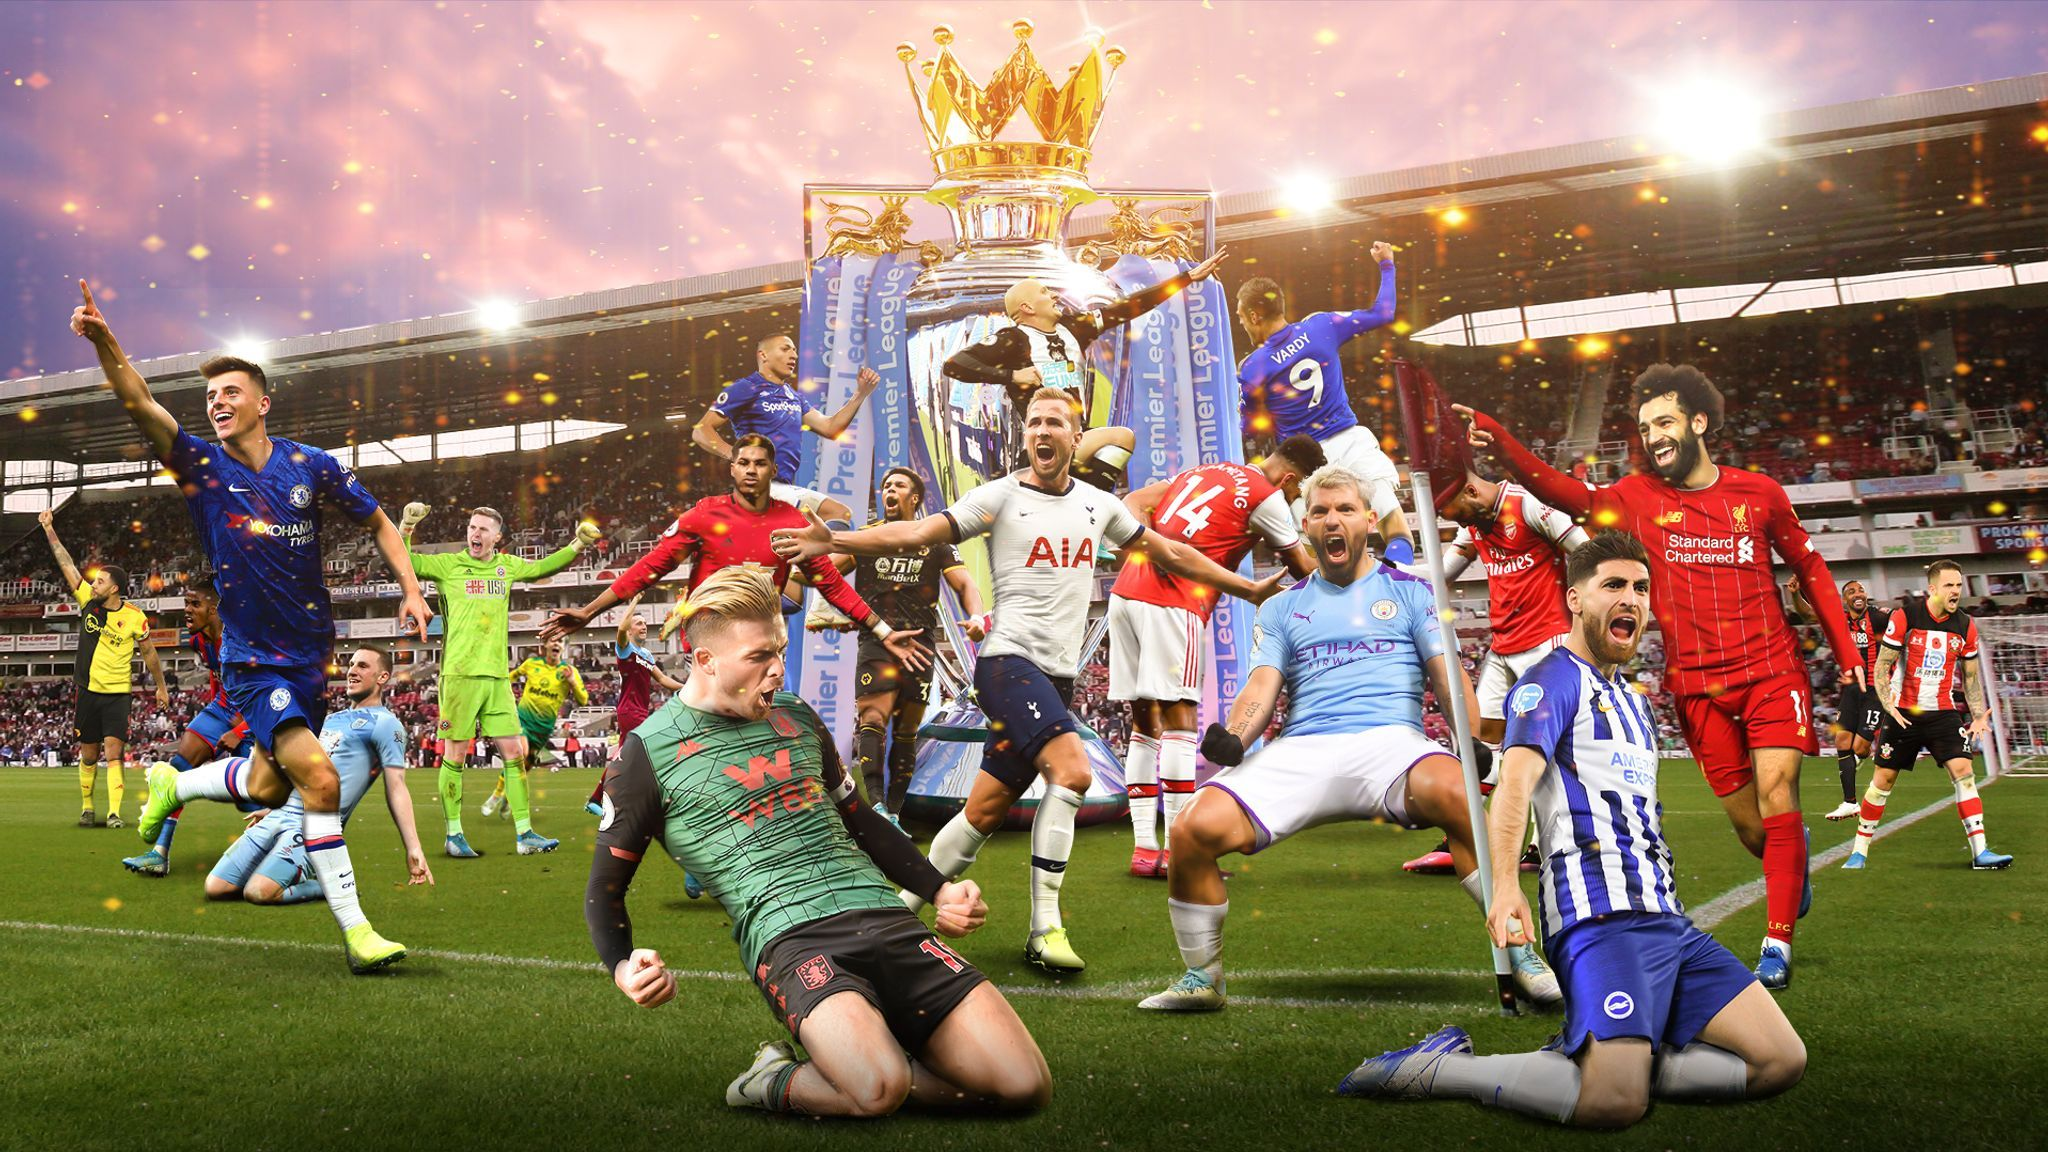

# The Premier League is by far one of the world’s most entertaining leagues. They have some of the best managers, players and fans! But, what makes it truly entertaining is the sheer unpredictability. There are 6 equally amazing teams with a different team lifting the trophy every season. Not only that, the league has also witnessed victories from teams outside of the top 6. So, let us analyze some of these instances.

# Let's try to predict most unpredictble league's match results

In [152]:
# import libraries 
import requests
from bs4 import BeautifulSoup

# We reffers to FBREF official web page to scrap live Premier League data using BeautifulSoup.

In [153]:
# add url into a variable
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

# Scraping our first page with requests

In [154]:
# request contents from the web page
data = requests.get(standings_url)

In [155]:
# get text from the web page
soup = BeautifulSoup(data.text)

In [211]:
#selecting table elements from the webpage
standings_table = soup.select('table.stats_table')[0]

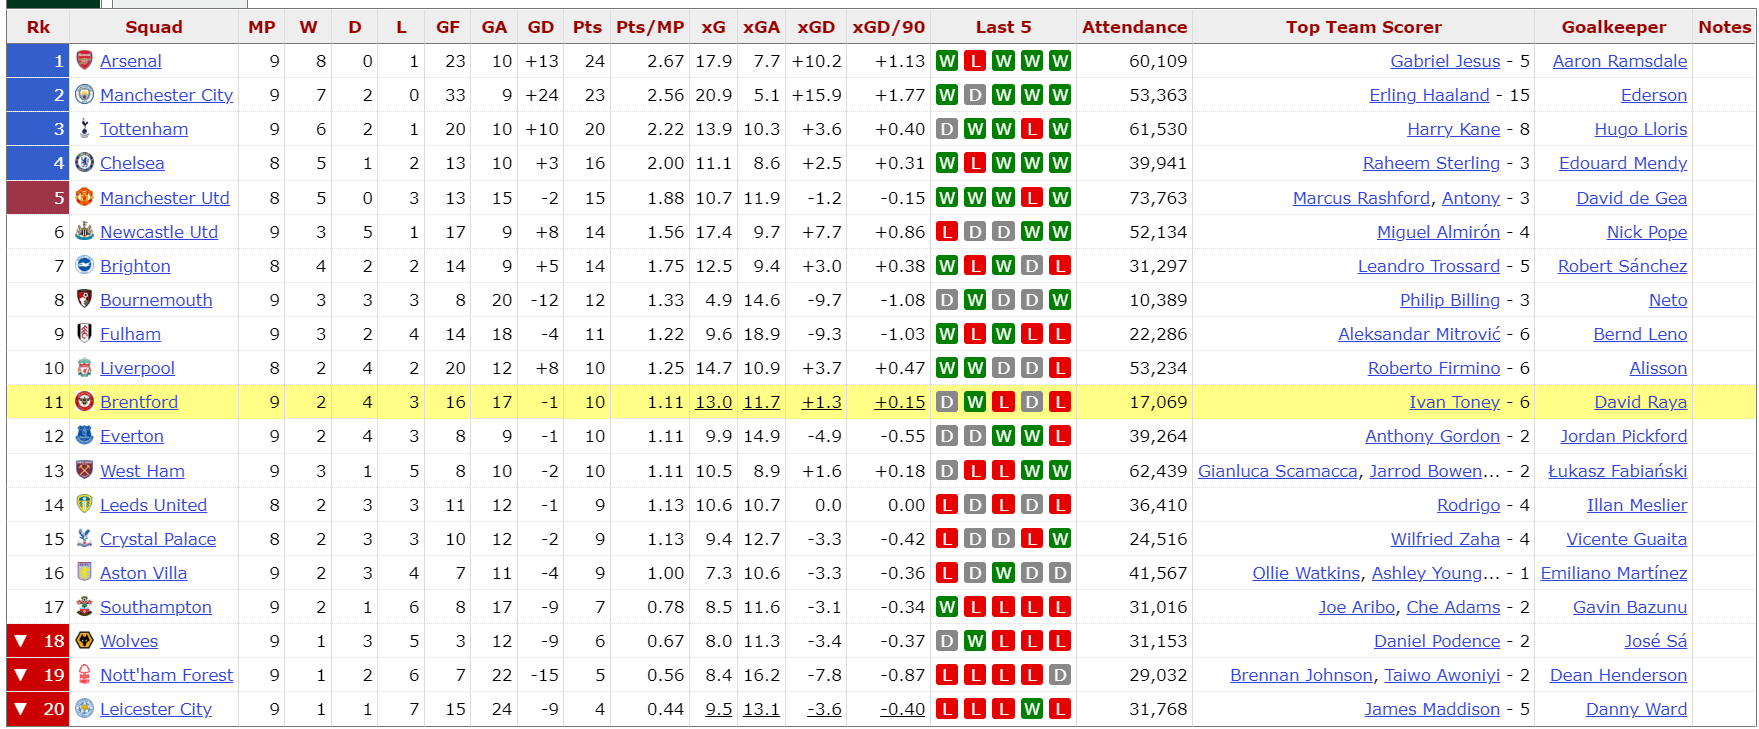

### Here we can notice every team's names are have included hyperlink, which we need to separate and keep only text

In [157]:
# extract squad names from hyperlink
links = standings_table.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]

# Parsing html links with BeautifulSoup

### Here we try to get every team's individual data by applyng for loop

In [158]:
# separate all table links bymtheir name 
team_urls = [f"https://fbref.com{l}" for l in links]

In [159]:
#getting contents from all diffrent team urls 
data = requests.get(team_urls[0])

### Next we try to scrap every team's Scores and fixtures by every matchweek

In [160]:
# importing Pandas for convert all data into daset
import pandas as pd
# read the html of specific table and extract text
matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

# Extract match stats using pandas and requests

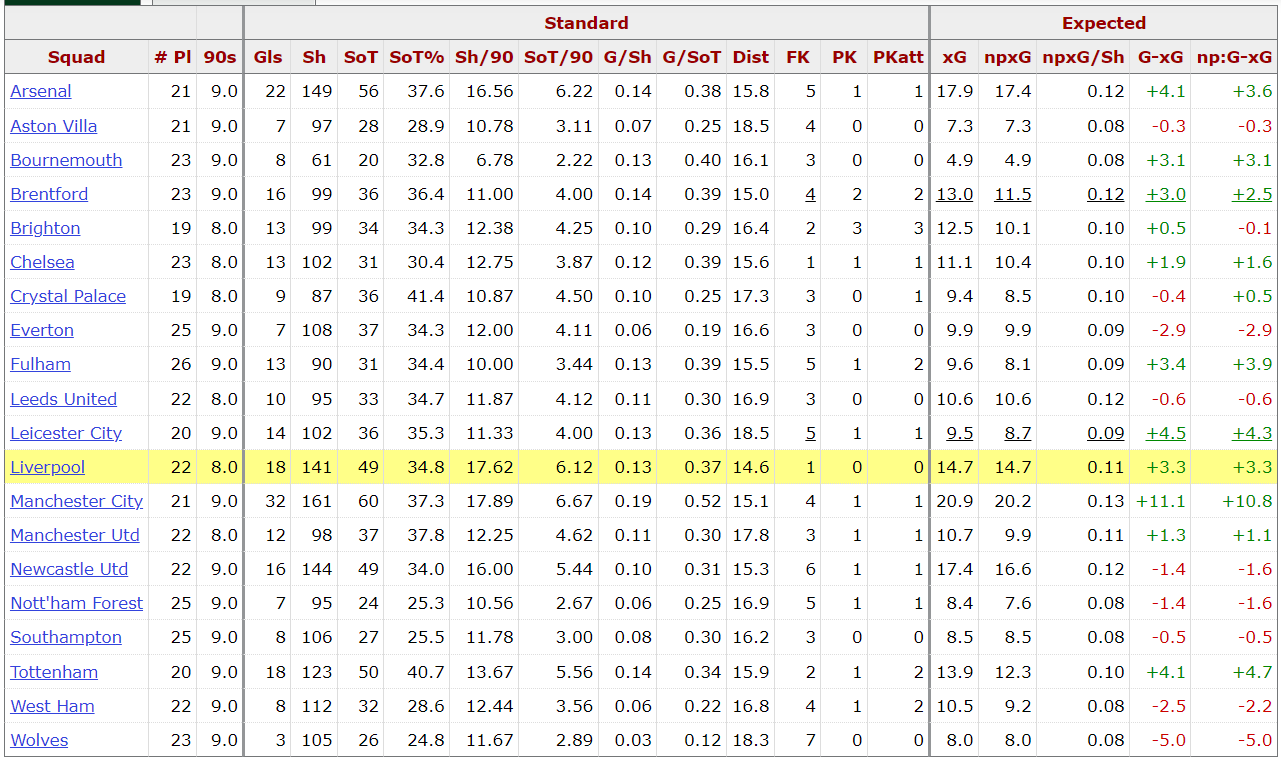

# Then we try to scrap every team's shooting stats and combine together

In [161]:
# get all shooting data from every team and convert into data frame
soup = BeautifulSoup(data.text)
links = soup.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if l and 'all_comps/shooting/' in l]
data = requests.get(f"https://fbref.com{links[0]}")
shooting = pd.read_html(data.text, match="Shooting")[0]
shooting.head()

For Arsenal                                                              \
         Date   Time            Comp        Round  Day Venue Result GF GA   
0  2022-08-05  20:00  Premier League  Matchweek 1  Fri  Away      W  2  0   
1  2022-08-13  15:00  Premier League  Matchweek 2  Sat  Home      W  4  2   
2  2022-08-20  17:30  Premier League  Matchweek 3  Sat  Away      W  3  0   
3  2022-08-27  17:30  Premier League  Matchweek 4  Sat  Home      W  2  1   
4  2022-08-31  19:30  Premier League  Matchweek 5  Wed  Home      W  2  1   

                  Standard                                              \
         Opponent      Gls  Sh SoT  SoT%  G/Sh G/SoT  Dist FK PK PKatt   
0  Crystal Palace        1  10   2  20.0  0.10  0.50  15.0  1  0     0   
1  Leicester City        4  19   7  36.8  0.21  0.57  12.6  0  0     0   
2     Bournemouth        3  14   6  42.9  0.21  0.50  14.6  0  0     0   
3          Fulham        2  23   8  34.8  0.09  0.25  16.6  1  0     0   
4     Aston Villa        2  22   8  36.4  0.09  0.25  15.3  1  0     0   

  Expected                           Unnamed: 25_level_0  
        xG npxG npxG/Sh G-xG np:G-xG        Match Report  
0      1.0  1.0    0.11  0.0     0.0        Match Report  
1      2.6  2.6    0.14  1.4     1.4        Match Report  
2      1.8  1.8    0.14  1.2     1.2        Match Report  
3      2.4  2.4    0.10 -0.4    -0.4        Match Report  
4      2.7  2.7    0.12 -0.7    -0.7        Match Report

# Get match shooting stats with requests and pandas

In [162]:
# dropping unnecessary top column
shooting.columns = shooting.columns.droplevel()

# Cleaning and merging scraped data with pandas

In [163]:
# merging team data and shooting data on date column
team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,0.9,43.0,25286.0,Martin Ødegaard,4-2-3-1,Anthony Taylor,Match Report,NaN,10,2,15.0,1,0,0
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.6,0.6,51.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19,7,12.6,0,0,0
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.8,0.3,59.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14,6,14.6,0,0,0
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.4,1.1,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,23,8,16.6,1,0,0
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.7,0.2,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22,8,15.3,1,0,0


### We will try to analyse current season's match performance and try to predict future result. Before that we need to scrap the live data first and create a apprpriate dataframe for this.

In [164]:
# scrap 1 season's data 2022- 2023
years = list(range(2023, 2022, -1))
all_matches = []
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

# Scraping data for multiple season and teams with a loop

In [165]:
# combine all our codes put in loop and we try to scrap every team's data
import time
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0]

    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        soup = BeautifulSoup(data.text)
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue
        team_data = team_data[team_data["Comp"] == "Premier League"]
        
        team_data["Season"] = year
        team_data["Team"] = team_name
        all_matches.append(team_data)
        time.sleep(1)

## As we know there are 20 teams are compete each other in premier league

In [166]:
len(all_matches)

20

In [167]:
pd.set_option('max_columns', None)

In [168]:

matches = pd.concat(all_matches)
matches.columns = [c.lower() for c in match_df.columns]# make all our team name in lower case for easy to use
matches["team"].unique()

array(['Arsenal', 'Manchester City', 'Tottenham Hotspur', 'Chelsea',
       'Manchester United', 'Newcastle United',
       'Brighton and Hove Albion', 'Bournemouth', 'Fulham', 'Liverpool',
       'Brentford', 'Everton', 'West Ham United', 'Leeds United',
       'Crystal Palace', 'Aston Villa', 'Southampton',
       'Wolverhampton Wanderers', 'Nottingham Forest', 'Leicester City'],
      dtype=object)

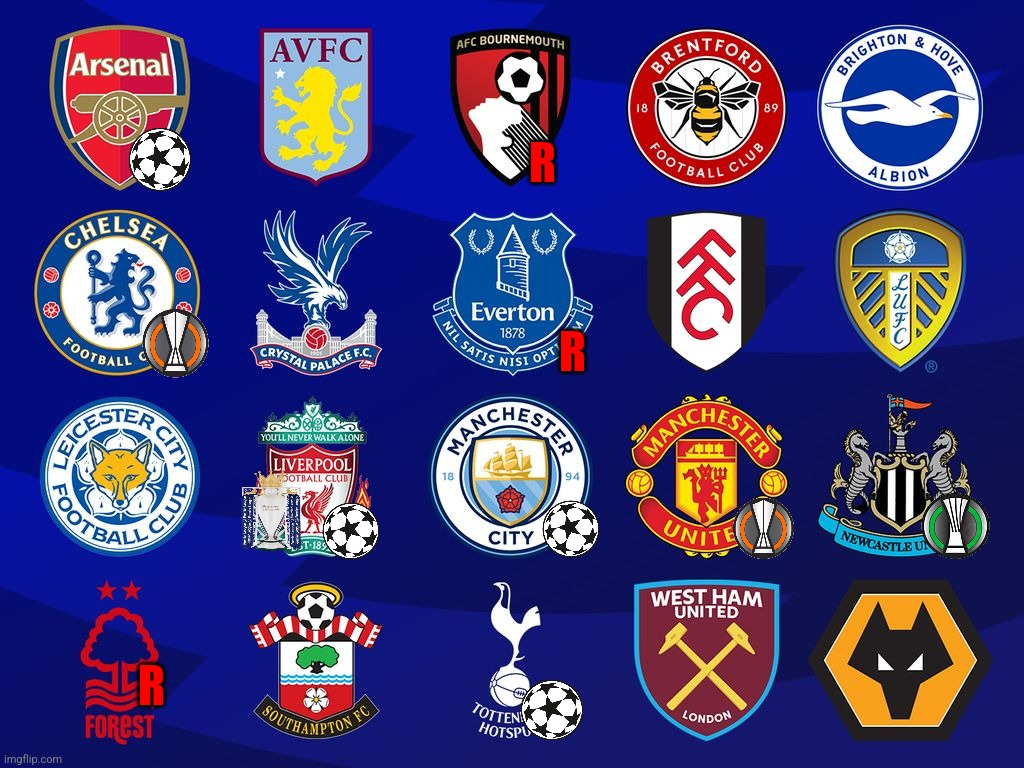

# After getting all datas from the web page in format of Dataset, Our aim is predict the match results using certain Machine learning algorithms.

In [169]:
# extract our scraped data into csv file
match_df.to_csv("matches.csv")

In [170]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [171]:
# let's analyse the scrapped dats
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,0.9,43.0,25286.0,Martin Ødegaard,4-2-3-1,Anthony Taylor,Match Report,NaN,10.0,2.0,15.0,1.0,0,0,2023,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.6,0.6,51.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,Match Report,NaN,19.0,7.0,12.6,0.0,0,0,2023,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.8,0.3,59.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,Match Report,NaN,14.0,6.0,14.6,0.0,0,0,2023,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.4,1.1,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,Match Report,NaN,23.0,8.0,16.6,1.0,0,0,2023,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.7,0.2,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,Match Report,NaN,22.0,8.0,15.3,1.0,0,0,2023,Arsenal


# Our first target is pre processing the data and make redy for the further analysis.

In [172]:
matches.shape

(174, 27)

### This dataset contains 174 match records and 32 variables.
### We know that total 380 matches will played in a single Primer League season.
### But we analyse 2022-23 season's data which is on going.
### let'see how many matches are played by each 20 teams

In [173]:
# total match played each team this season
matches["team"].value_counts()

Tottenham Hotspur           9
Leicester City              9
Brentford                   9
Aston Villa                 9
West Ham United             9
Manchester City             9
Wolverhampton Wanderers     9
Newcastle United            9
Everton                     9
Nottingham Forest           9
Bournemouth                 9
Arsenal                     9
Southampton                 9
Fulham                      9
Crystal Palace              8
Chelsea                     8
Liverpool                   8
Manchester United           8
Brighton and Hove Albion    8
Leeds United                8
Name: team, dtype: int64

### As we can see there are 6 clubs are stand out from other teams by playing only 8 matches due to postponement.

### I like to analyse my favorite team Machester City

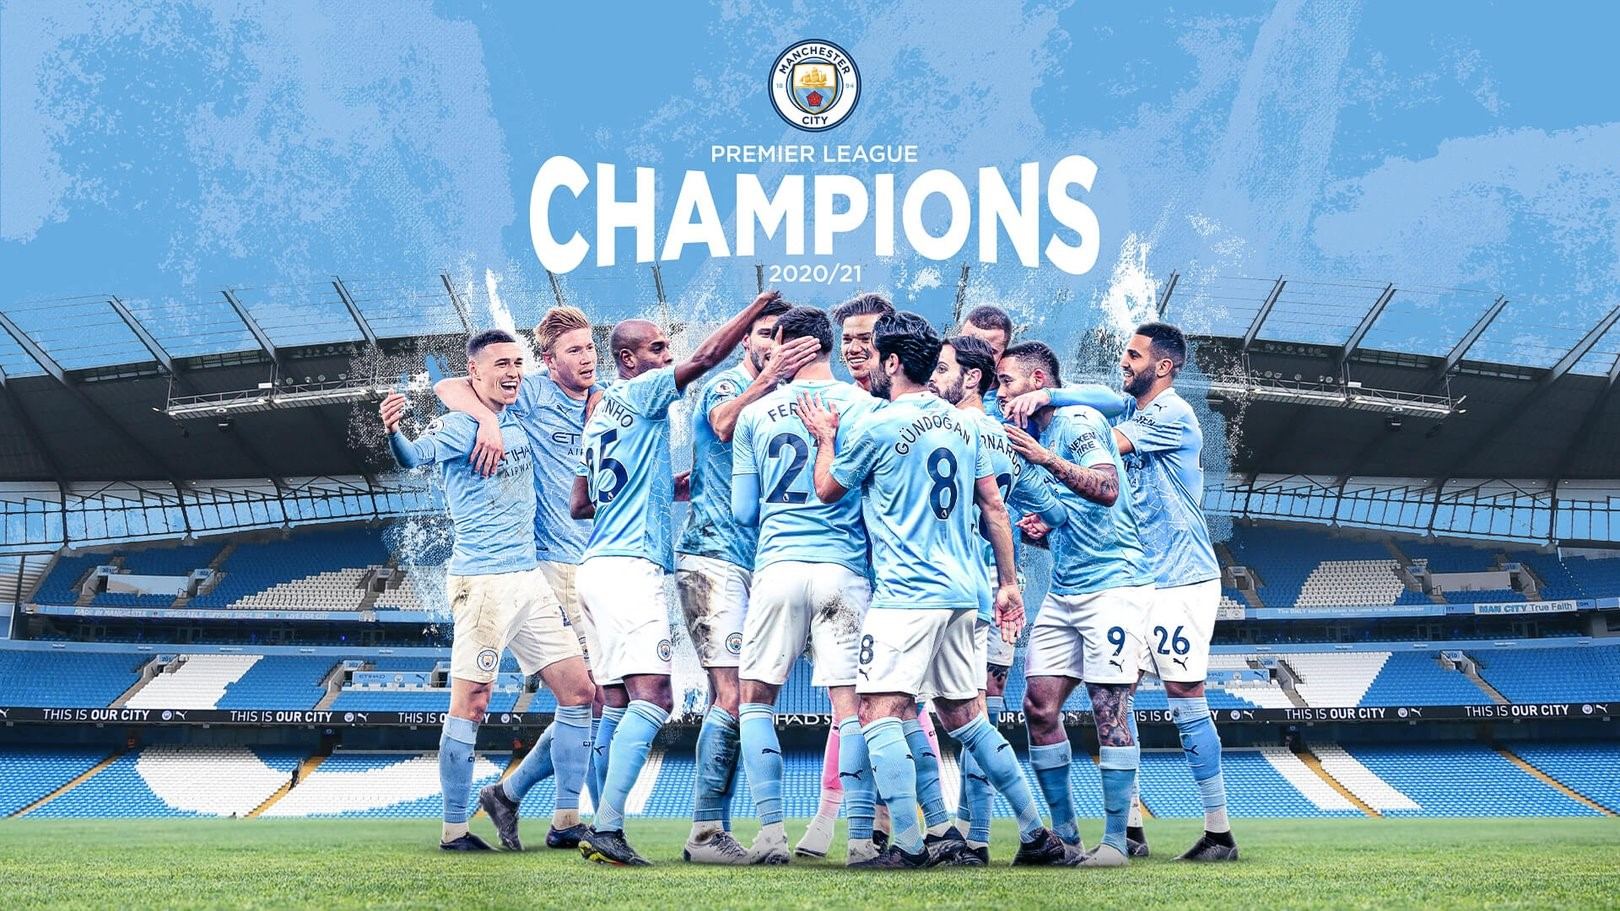

In [174]:
# Analyzing stats of Liverpool
matches[matches["team"] == "Manchester City"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.3,0.4,75.0,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN,13.0,1.0,18.2,1.0,1,1,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.6,0.1,67.0,53453.0,İlkay Gündoğan,4-3-3,David Coote,Match Report,NaN,20.0,7.0,15.6,0.0,0,0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.7,1.8,69.0,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN,22.0,10.0,15.1,1.0,0,0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.5,0.1,75.0,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN,18.0,5.0,13.1,0.0,0,0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.7,0.4,74.0,53409.0,İlkay Gündoğan,4-4-2,Paul Tierney,Match Report,NaN,17.0,9.0,14.1,0.0,0,0,2023,Manchester City
6,2022-09-03,17:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,Aston Villa,1.4,0.2,71.0,41830.0,İlkay Gündoğan,4-3-3,Simon Hooper,Match Report,NaN,13.0,4.0,15.7,1.0,0,0,2023,Manchester City
9,2022-09-17,12:30,Premier League,Matchweek 8,Sat,Away,W,3.0,0.0,Wolves,1.4,0.5,59.0,31578.0,Kevin De Bruyne,4-3-3,Anthony Taylor,Match Report,NaN,15.0,7.0,18.8,0.0,0,0,2023,Manchester City
10,2022-10-02,14:00,Premier League,Matchweek 9,Sun,Home,W,6.0,3.0,Manchester Utd,2.9,1.5,54.0,53475.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN,22.0,9.0,13.5,1.0,0,0,2023,Manchester City
12,2022-10-08,15:00,Premier League,Matchweek 10,Sat,Home,W,4.0,0.0,Southampton,2.4,0.1,65.0,53365.0,Kevin De Bruyne,4-3-3,Andy Madley,Match Report,NaN,21.0,8.0,14.0,0.0,0,0,2023,Manchester City


### Machester City performing very well this season with 7 Wins 2 Draws and 0 Loss.

In [175]:
# every match week round count
matches["round"].value_counts()

Matchweek 2     20
Matchweek 4     20
Matchweek 10    20
Matchweek 9     20
Matchweek 1     20
Matchweek 6     20
Matchweek 5     20
Matchweek 3     20
Matchweek 8     14
Name: round, dtype: int64

### In Matcheek 8 there are these 6 postponement 

In [176]:
# Dropping duplicates incase some duplicate values are present their
matches=matches.drop_duplicates()

In [177]:
# Investigating the data types
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf               object
ga               object
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes            object
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [178]:
# checking null values
matches.isnull().sum()

date              0
time              0
comp              0
round             0
day               0
venue             0
result            0
gf                0
ga                0
opponent          0
xg                0
xga               0
poss              0
attendance        0
captain           0
formation         0
referee           0
match report      0
notes           174
sh                0
sot               0
dist              0
fk                0
pk                0
pkatt             0
season            0
team              0
dtype: int64

### We found only notes colum are full of null value, we should remove that.

In [179]:
matches.nunique()

date            25
time            11
comp             1
round            9
day              7
venue            2
result           3
gf              13
ga              15
opponent        20
xg              34
xga             34
poss            51
attendance      87
captain         40
formation       11
referee         19
match report     1
notes            0
sh              23
sot             13
dist            85
fk               4
pk               2
pkatt            2
season           1
team            20
dtype: int64

### removing colums from dataset which contais single value all over the dataset 

In [180]:
# removing the unnecessary columns
del matches["comp"]
del matches["notes"]
del matches["match report"]
del matches["season"]


In [181]:
# changing datatypes to their appropriate one 
matches["date"] = pd.to_datetime(matches["date"])

# Creating predictors for machine learning

### Machine learning algorithms Only work with numeric data so we have to convert our target value datatype object to integer which are going to be our main factor.
### We code win as 1 and code both lose and draw as 0.
### We code venue home as 1 and away as 0.
### we code diffrent teams name as unique integer values.

In [182]:
# converting categorical value to numeric and add them into new column
matches["target"] = (matches["result"] == "W").astype("int")
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [183]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team,target,venue_code,opp_code
0,2022-08-05,20:00,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,0.9,43.0,25286.0,Martin Ødegaard,4-2-3-1,Anthony Taylor,10.0,2.0,15.0,1.0,0,0,Arsenal,1,0,6
1,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.6,0.6,51.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,19.0,7.0,12.6,0.0,0,0,Arsenal,1,1,10
2,2022-08-20,17:30,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.8,0.3,59.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,14.0,6.0,14.6,0.0,0,0,Arsenal,1,0,2
3,2022-08-27,17:30,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.4,1.1,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,23.0,8.0,16.6,1.0,0,0,Arsenal,1,1,8
4,2022-08-31,19:30,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.7,0.2,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,22.0,8.0,15.3,1.0,0,0,Arsenal,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2022-09-01,20:00,Matchweek 5,Thu,Home,L,0,1,Manchester Utd,0.6,1.1,53.0,32226.0,Jonny Evans,4-1-4-1,Craig Pawson,10.0,2.0,22.6,2.0,0,0,Leicester City,0,1,13
6,2022-09-04,14:00,Matchweek 6,Sun,Away,L,2,5,Brighton,1.7,2.4,46.0,31185.0,Jonny Evans,4-4-2,Tony Harrington,6.0,4.0,14.3,0.0,0,0,Leicester City,0,0,4
7,2022-09-17,17:30,Matchweek 8,Sat,Away,L,2,6,Tottenham,1.7,1.7,56.0,61450.0,Jonny Evans,4-3-3,Simon Hooper,18.0,6.0,21.6,0.0,1,1,Leicester City,0,0,17
8,2022-10-03,20:00,Matchweek 9,Mon,Home,W,4,0,Nott'ham Forest,1.1,1.2,52.0,32202.0,Jonny Evans,4-1-4-1,Robert Jones,16.0,6.0,16.8,1.0,0,0,Leicester City,1,1,15


### Add some specific column which is help us in our further analysis

In [184]:
# Adding new columns
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team,target,venue_code,opp_code,hour,day_code
0,2022-08-05,20:00,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,1.0,0.9,43.0,25286.0,Martin Ødegaard,4-2-3-1,Anthony Taylor,10.0,2.0,15.0,1.0,0,0,Arsenal,1,0,6,20,4
1,2022-08-13,15:00,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,2.6,0.6,51.0,60033.0,Martin Ødegaard,4-2-3-1,Darren England,19.0,7.0,12.6,0.0,0,0,Arsenal,1,1,10,15,5
2,2022-08-20,17:30,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,1.8,0.3,59.0,10423.0,Martin Ødegaard,4-2-3-1,Craig Pawson,14.0,6.0,14.6,0.0,0,0,Arsenal,1,0,2,17,5
3,2022-08-27,17:30,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.4,1.1,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,23.0,8.0,16.6,1.0,0,0,Arsenal,1,1,8,17,5
4,2022-08-31,19:30,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.7,0.2,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,22.0,8.0,15.3,1.0,0,0,Arsenal,1,1,1,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2022-09-01,20:00,Matchweek 5,Thu,Home,L,0,1,Manchester Utd,0.6,1.1,53.0,32226.0,Jonny Evans,4-1-4-1,Craig Pawson,10.0,2.0,22.6,2.0,0,0,Leicester City,0,1,13,20,3
6,2022-09-04,14:00,Matchweek 6,Sun,Away,L,2,5,Brighton,1.7,2.4,46.0,31185.0,Jonny Evans,4-4-2,Tony Harrington,6.0,4.0,14.3,0.0,0,0,Leicester City,0,0,4,14,6
7,2022-09-17,17:30,Matchweek 8,Sat,Away,L,2,6,Tottenham,1.7,1.7,56.0,61450.0,Jonny Evans,4-3-3,Simon Hooper,18.0,6.0,21.6,0.0,1,1,Leicester City,0,0,17,17,5
8,2022-10-03,20:00,Matchweek 9,Mon,Home,W,4,0,Nott'ham Forest,1.1,1.2,52.0,32202.0,Jonny Evans,4-1-4-1,Robert Jones,16.0,6.0,16.8,1.0,0,0,Leicester City,1,1,15,20,0


# Creating our initial machine learning model

### Here we applying RandomForestClassifier for getting good accuracy

In [185]:
# Initializing RandomForestclassifier, I prefer 50 decision trees in our model and 10 minimum number of samples to split an internal node
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

### I prefer to train .75 of this season data and test .25  of this season data

In [186]:
# We train the model by records before 2022-10-01
train = matches[matches["date"] < '2022-10-01']
train.shape

(134, 28)

In [187]:
# We test the model by  records after 1022-10-01
test = matches[matches["date"] > '2022-10-01']
test.shape

(26, 28)

### Here we take venue_code, opp_code, hour and day_code as our predictor columns.

In [188]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]


In [189]:
# Let's train our target variable with our predictors
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [190]:
# Let's predict the test data
preds = rf.predict(test[predictors])

### Check the accuracy of our model

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
#checking the accuracy score
error = accuracy_score(test["target"], preds)
error

0.7307692307692307

### We found that our accuracy score is really good 

In [216]:
# let's check the precision of our test data and prediction data
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))
combined.head(20)

,actual,predicted
10,1,0
10,1,0
12,1,1
11,1,0
10,1,1
8,0,0
10,1,0
9,1,1
8,0,0
9,1,1


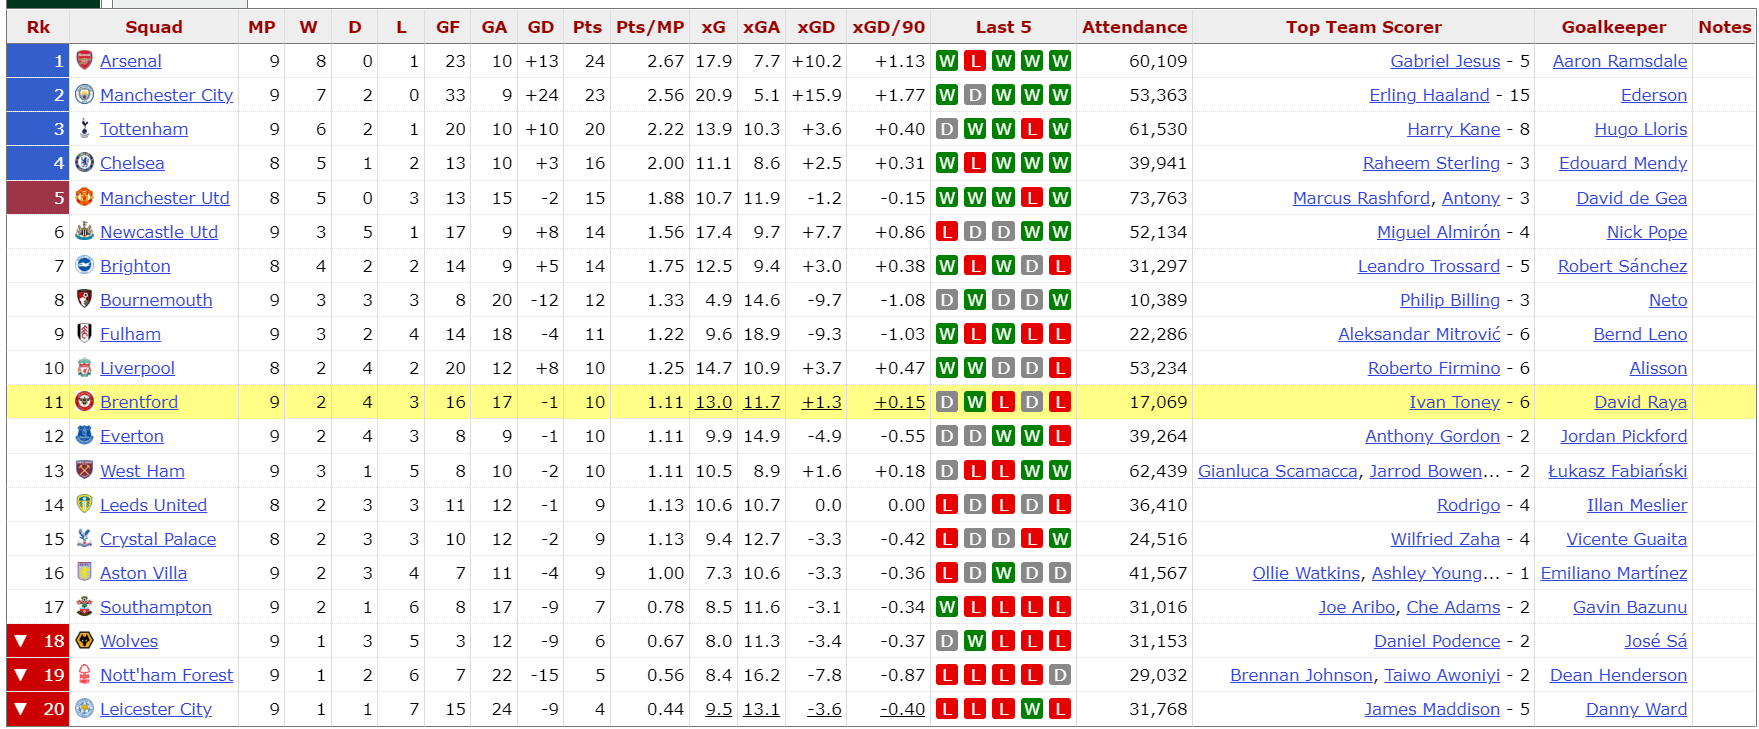

In [194]:
# creating a crosstab
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,14,1
1,6,5


In [195]:
# checking the precision score
from sklearn.metrics import precision_score

precision_score(test["target"], preds)

0.8333333333333334

### Here we found that the precision score of pur prediction is too high, it's because of the data is quite small.

# Improving precision with rolling averages

### Here we try to predict results by analyzing the previous game performance of the team. 

In [196]:
# groupby dataset by teams
grouped_matches = matches.groupby("team")

In [197]:
# First we look at the single group
group = grouped_matches.get_group("Manchester City").sort_values("date")

### we take average of each 3 week records and analyse our target value accoring this.

In [198]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date") # sorting values accoring date
    rolling_stats = group[cols].rolling(3, closed='left').mean() # taking average of 3 match week
    group[new_cols] = rolling_stats
    group= group.dropna(subset=new_cols)
    return group


In [199]:
# creating new colum to assign value
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team,target,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
4,2022-08-27,15:00,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.5,0.1,75.0,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,18.0,5.0,13.1,0.0,0,0,Manchester City,1,1,6,15,5,3.000000,1.000000,18.333333,6.000000,16.3,0.666667,0.333333,0.333333
5,2022-08-31,19:30,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.7,0.4,74.0,53409.0,İlkay Gündoğan,4-4-2,Paul Tierney,17.0,9.0,14.1,0.0,0,0,Manchester City,1,1,15,19,2,3.666667,1.666667,20.000000,7.333333,14.6,0.333333,0.000000,0.000000
6,2022-09-03,17:30,Matchweek 6,Sat,Away,D,1.0,1.0,Aston Villa,1.4,0.2,71.0,41830.0,İlkay Gündoğan,4-3-3,Simon Hooper,13.0,4.0,15.7,1.0,0,0,Manchester City,0,0,1,17,5,4.333333,1.666667,19.000000,8.000000,14.1,0.333333,0.000000,0.000000
9,2022-09-17,12:30,Matchweek 8,Sat,Away,W,3.0,0.0,Wolves,1.4,0.5,59.0,31578.0,Kevin De Bruyne,4-3-3,Anthony Taylor,15.0,7.0,18.8,0.0,0,0,Manchester City,1,0,19,12,5,3.666667,1.000000,16.000000,6.000000,14.3,0.333333,0.000000,0.000000
10,2022-10-02,14:00,Matchweek 9,Sun,Home,W,6.0,3.0,Manchester Utd,2.9,1.5,54.0,53475.0,İlkay Gündoğan,4-3-3,Michael Oliver,22.0,9.0,13.5,1.0,0,0,Manchester City,1,1,13,14,6,3.333333,0.333333,15.000000,6.666667,16.2,0.333333,0.000000,0.000000
12,2022-10-08,15:00,Matchweek 10,Sat,Home,W,4.0,0.0,Southampton,2.4,0.1,65.0,53365.0,Kevin De Bruyne,4-3-3,Andy Madley,21.0,8.0,14.0,0.0,0,0,Manchester City,1,1,16,15,5,3.333333,1.333333,16.666667,6.666667,16.0,0.666667,0.000000,0.000000


In [200]:
# Compute the rolling average for each team
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

date   time         round  day venue result  \
team                                                                          
Arsenal                 3 2022-08-27  17:30   Matchweek 4  Sat  Home      W   
                        4 2022-08-31  19:30   Matchweek 5  Wed  Home      W   
                        5 2022-09-04  16:30   Matchweek 6  Sun  Away      L   
                        7 2022-09-18  12:00   Matchweek 8  Sun  Away      W   
                        8 2022-10-01  12:30   Matchweek 9  Sat  Home      W   
...                              ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 5 2022-08-31  19:30   Matchweek 5  Wed  Away      D   
                        6 2022-09-03  15:00   Matchweek 6  Sat  Home      W   
                        7 2022-09-17  12:30   Matchweek 8  Sat  Home      L   
                        8 2022-10-01  17:30   Matchweek 9  Sat  Away      L   
                        9 2022-10-08  15:00  Matchweek 10  Sat  Away      L   

                            gf   ga         opponent   xg  xga  poss  \
team                                                                   
Arsenal                 3  2.0  1.0           Fulham  2.4  1.1  71.0   
                        4  2.0  1.0      Aston Villa  2.7  0.2  59.0   
                        5  1.0  3.0   Manchester Utd  1.3  1.8  60.0   
                        7  3.0  0.0        Brentford  1.0  0.5  64.0   
                        8  3.0  1.0        Tottenham  2.6  1.5  65.0   
...                        ...  ...              ...  ...  ...   ...   
Wolverhampton Wanderers 5  0.0  0.0      Bournemouth  1.5  0.5  65.0   
                        6  1.0  0.0      Southampton  0.7  1.0  50.0   
                        7  0.0  3.0  Manchester City  0.5  1.4  41.0   
                        8  0.0  2.0         West Ham  0.7  1.0  61.0   
                        9  0.0  3.0          Chelsea  1.0  2.1  43.0   

                           attendance          captain formation  \
team                                                               
Arsenal                 3     60164.0  Martin Ødegaard   4-2-3-1   
                        4     60012.0  Martin Ødegaard   4-2-3-1   
                        5     73431.0  Martin Ødegaard   4-2-3-1   
                        7     17122.0     Granit Xhaka   4-2-3-1   
                        8     60278.0  Martin Ødegaard   4-2-3-1   
...                               ...              ...       ...   
Wolverhampton Wanderers 5     10113.0      Rúben Neves     4-3-3   
                        6     30546.0      Rúben Neves   4-2-3-1   
                        7     31578.0      Rúben Neves     4-3-3   
                        8     62444.0      Rúben Neves     3-4-3   
                        9     39940.0    João Moutinho   4-2-3-1   

                                  referee    sh  sot  dist   fk  pk  pkatt  \
team                                                                         
Arsenal                 3  Jarred Gillett  23.0  8.0  16.6  1.0   0      0   
                        4    Robert Jones  22.0  8.0  15.3  1.0   0      0   
                        5    Paul Tierney  16.0  3.0  18.5  1.0   0      0   
                        7     David Coote  13.0  7.0  17.1  0.0   0      0   
                        8  Anthony Taylor  22.0  9.0  17.7  1.0   0      0   
...                                   ...   ...  ...   ...  ...  ..    ...   
Wolverhampton Wanderers 5  Anthony Taylor  17.0  3.0  17.4  1.0   0      0   
                        6     John Brooks   7.0  2.0  13.2  0.0   0      0   
                        7  Anthony Taylor   6.0  1.0  19.3  2.0   0      0   
                        8    Paul Tierney  15.0  4.0  20.4  0.0   0      0   
                        9    Simon Hooper   8.0  2.0  12.9  1.0   0      0   

                                              team  target  venue_code  \
team                                                                     
Arsenal            

In [201]:
# we droped the team colum which is completely unnecessary from now
matches_rolling = matches_rolling.droplevel('team')
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team,target,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3,2022-08-27,17:30,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.4,1.1,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,23.0,8.0,16.6,1.0,0,0,Arsenal,1,1,8,17,5,3.000000,0.666667,14.333333,5.000000,14.066667,0.333333,0.0,0.0
4,2022-08-31,19:30,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.7,0.2,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,22.0,8.0,15.3,1.0,0,0,Arsenal,1,1,1,19,2,3.000000,1.000000,18.666667,7.000000,14.600000,0.333333,0.0,0.0
5,2022-09-04,16:30,Matchweek 6,Sun,Away,L,1.0,3.0,Manchester Utd,1.3,1.8,60.0,73431.0,Martin Ødegaard,4-2-3-1,Paul Tierney,16.0,3.0,18.5,1.0,0,0,Arsenal,0,0,13,16,6,2.333333,0.666667,19.666667,7.333333,15.500000,0.666667,0.0,0.0
7,2022-09-18,12:00,Matchweek 8,Sun,Away,W,3.0,0.0,Brentford,1.0,0.5,64.0,17122.0,Granit Xhaka,4-2-3-1,David Coote,13.0,7.0,17.1,0.0,0,0,Arsenal,1,0,3,12,6,1.666667,1.666667,20.333333,6.333333,16.800000,1.000000,0.0,0.0
8,2022-10-01,12:30,Matchweek 9,Sat,Home,W,3.0,1.0,Tottenham,2.6,1.5,65.0,60278.0,Martin Ødegaard,4-2-3-1,Anthony Taylor,22.0,9.0,17.7,1.0,0,0,Arsenal,1,1,17,12,5,2.000000,1.333333,17.000000,6.000000,16.966667,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2022-08-31,19:30,Matchweek 5,Wed,Away,D,0.0,0.0,Bournemouth,1.5,0.5,65.0,10113.0,Rúben Neves,4-3-3,Anthony Taylor,17.0,3.0,17.4,1.0,0,0,Wolverhampton Wanderers,0,0,2,19,2,0.333333,0.666667,12.333333,2.666667,19.600000,1.000000,0.0,0.0
6,2022-09-03,15:00,Matchweek 6,Sat,Home,W,1.0,0.0,Southampton,0.7,1.0,50.0,30546.0,Rúben Neves,4-2-3-1,John Brooks,7.0,2.0,13.2,0.0,0,0,Wolverhampton Wanderers,1,1,16,15,5,0.333333,0.666667,15.666667,3.333333,19.066667,1.000000,0.0,0.0
7,2022-09-17,12:30,Matchweek 8,Sat,Home,L,0.0,3.0,Manchester City,0.5,1.4,41.0,31578.0,Rúben Neves,4-3-3,Anthony Taylor,6.0,1.0,19.3,2.0,0,0,Wolverhampton Wanderers,0,1,12,12,5,0.666667,0.333333,11.333333,3.000000,16.600000,0.666667,0.0,0.0
8,2022-10-01,17:30,Matchweek 9,Sat,Away,L,0.0,2.0,West Ham,0.7,1.0,61.0,62444.0,Rúben Neves,3-4-3,Paul Tierney,15.0,4.0,20.4,0.0,0,0,Wolverhampton Wanderers,0,0,18,17,5,0.333333,1.000000,10.000000,2.000000,16.633333,1.000000,0.0,0.0


### Here we can see the indexes are not unique so we assign them with unique indexes.

In [202]:
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,sh,sot,dist,fk,pk,pkatt,team,target,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2022-08-27,17:30,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,2.4,1.1,71.0,60164.0,Martin Ødegaard,4-2-3-1,Jarred Gillett,23.0,8.0,16.6,1.0,0,0,Arsenal,1,1,8,17,5,3.000000,0.666667,14.333333,5.000000,14.066667,0.333333,0.0,0.0
1,2022-08-31,19:30,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,2.7,0.2,59.0,60012.0,Martin Ødegaard,4-2-3-1,Robert Jones,22.0,8.0,15.3,1.0,0,0,Arsenal,1,1,1,19,2,3.000000,1.000000,18.666667,7.000000,14.600000,0.333333,0.0,0.0
2,2022-09-04,16:30,Matchweek 6,Sun,Away,L,1.0,3.0,Manchester Utd,1.3,1.8,60.0,73431.0,Martin Ødegaard,4-2-3-1,Paul Tierney,16.0,3.0,18.5,1.0,0,0,Arsenal,0,0,13,16,6,2.333333,0.666667,19.666667,7.333333,15.500000,0.666667,0.0,0.0
3,2022-09-18,12:00,Matchweek 8,Sun,Away,W,3.0,0.0,Brentford,1.0,0.5,64.0,17122.0,Granit Xhaka,4-2-3-1,David Coote,13.0,7.0,17.1,0.0,0,0,Arsenal,1,0,3,12,6,1.666667,1.666667,20.333333,6.333333,16.800000,1.000000,0.0,0.0
4,2022-10-01,12:30,Matchweek 9,Sat,Home,W,3.0,1.0,Tottenham,2.6,1.5,65.0,60278.0,Martin Ødegaard,4-2-3-1,Anthony Taylor,22.0,9.0,17.7,1.0,0,0,Arsenal,1,1,17,12,5,2.000000,1.333333,17.000000,6.000000,16.966667,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-08-31,19:30,Matchweek 5,Wed,Away,D,0.0,0.0,Bournemouth,1.5,0.5,65.0,10113.0,Rúben Neves,4-3-3,Anthony Taylor,17.0,3.0,17.4,1.0,0,0,Wolverhampton Wanderers,0,0,2,19,2,0.333333,0.666667,12.333333,2.666667,19.600000,1.000000,0.0,0.0
110,2022-09-03,15:00,Matchweek 6,Sat,Home,W,1.0,0.0,Southampton,0.7,1.0,50.0,30546.0,Rúben Neves,4-2-3-1,John Brooks,7.0,2.0,13.2,0.0,0,0,Wolverhampton Wanderers,1,1,16,15,5,0.333333,0.666667,15.666667,3.333333,19.066667,1.000000,0.0,0.0
111,2022-09-17,12:30,Matchweek 8,Sat,Home,L,0.0,3.0,Manchester City,0.5,1.4,41.0,31578.0,Rúben Neves,4-3-3,Anthony Taylor,6.0,1.0,19.3,2.0,0,0,Wolverhampton Wanderers,0,1,12,12,5,0.666667,0.333333,11.333333,3.000000,16.600000,0.666667,0.0,0.0
112,2022-10-01,17:30,Matchweek 9,Sat,Away,L,0.0,2.0,West Ham,0.7,1.0,61.0,62444.0,Rúben Neves,3-4-3,Paul Tierney,15.0,4.0,20.4,0.0,0,0,Wolverhampton Wanderers,0,0,18,17,5,0.333333,1.000000,10.000000,2.000000,16.633333,1.000000,0.0,0.0


# Representing our machine learning model

In [203]:
# let's predict our model in basis of rolling average 
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-10-01']
    test = data[data["date"] > '2022-10-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [204]:
# checking the precision by rolling average 
combined, error = make_predictions(matches_rolling, predictors + new_cols)
error

0.75

### Let's compare the predicted result vs actual result

In [205]:
# Merge predicted value with predictor column and result column.
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)
combined.head(50)

,actual,predicted,date,team,opponent,result
5,1,0,2022-10-09,Arsenal,Liverpool,W
10,0,0,2022-10-02,Aston Villa,Leeds United,D
11,0,0,2022-10-10,Aston Villa,Nott'ham Forest,D
17,1,0,2022-10-08,Bournemouth,Leicester City,W
23,0,0,2022-10-08,Brentford,Newcastle Utd,L
28,0,1,2022-10-08,Brighton and Hove Albion,Tottenham,L
33,1,0,2022-10-08,Chelsea,Wolves,W
38,1,0,2022-10-09,Crystal Palace,Leeds United,W
44,0,0,2022-10-09,Everton,Manchester Utd,L
50,0,0,2022-10-09,Fulham,West Ham,L


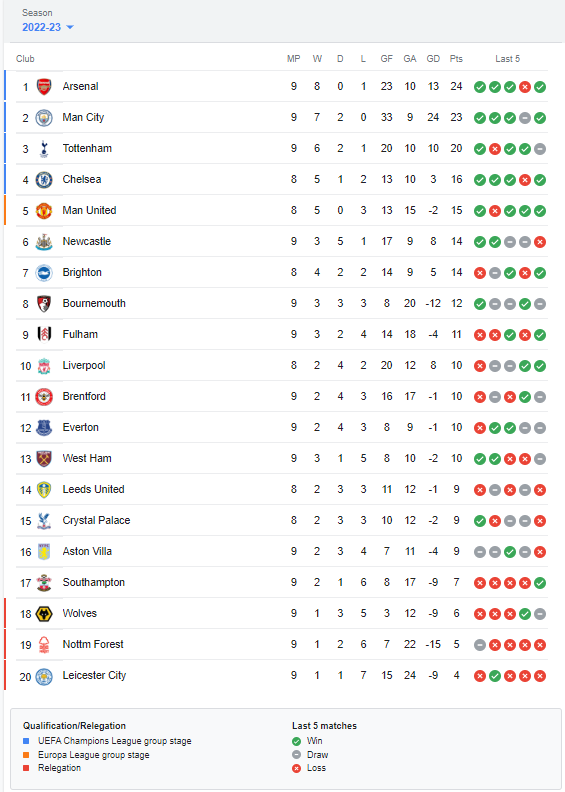

# Combining home and away predictions

### For combining home and away result first we need to make team name equal

In [206]:
#  change home team name according the away team name
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"} 
mapping = MissingDict(**map_values)

In [207]:
# map the dataset according similar team name
combined["new_team"] = combined["team"].map(mapping)

### We have to merge dataset similar opponent  team name

In [208]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,1,0,2022-10-09,Arsenal,Liverpool,W,Arsenal,0,0,Liverpool,Arsenal,L,Liverpool
1,0,0,2022-10-02,Aston Villa,Leeds United,D,Aston Villa,0,0,Leeds United,Aston Villa,D,Leeds United
2,0,0,2022-10-10,Aston Villa,Nott'ham Forest,D,Aston Villa,0,0,Nottingham Forest,Aston Villa,D,Nottingham Forest
3,1,0,2022-10-08,Bournemouth,Leicester City,W,Bournemouth,0,0,Leicester City,Bournemouth,L,Leicester City
4,0,0,2022-10-08,Brentford,Newcastle Utd,L,Brentford,1,1,Newcastle United,Brentford,W,Newcastle Utd
5,0,1,2022-10-08,Brighton and Hove Albion,Tottenham,L,Brighton,1,0,Tottenham Hotspur,Brighton,W,Tottenham
6,1,0,2022-10-08,Chelsea,Wolves,W,Chelsea,0,0,Wolverhampton Wanderers,Chelsea,L,Wolves
7,1,0,2022-10-09,Crystal Palace,Leeds United,W,Crystal Palace,0,0,Leeds United,Crystal Palace,L,Leeds United
8,0,0,2022-10-09,Everton,Manchester Utd,L,Everton,1,0,Manchester United,Everton,W,Manchester Utd
9,0,0,2022-10-09,Fulham,West Ham,L,Fulham,1,0,West Ham United,Fulham,W,West Ham


In [209]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

1    3
0    1
Name: actual_x, dtype: int64